# Default training curves

In [36]:
import csv

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load the data
train_success_metric_filename = "wandb_export_2023-12-08T02_11_09.859+09_00.csv"

train_success_metric_data = None
with open(train_success_metric_filename, "r") as f:
  csv_reader = csv.reader(f)
  train_success_metric_data = list(csv_reader)

  # for ridx, row in enumerate(csv_reader):
  #   print(row)
  #   if ridx == 10:
  #     break
print(len(train_success_metric_data))

1335


In [56]:
headers_row = train_success_metric_data[0]; headers_row
for cidx, header in enumerate(headers_row):
  # if header.endswith("metrics/success"):
  print(f"{cidx}: {header}")


0: global_step
1: exp_name: ppo_bc__savi_ss1_rgb_spectro__gwtv3__gw_detach__usenull__grulynrm__entcoef_0.2__no_cew__h_64 (SAVI BC Dataset_v0) - _step
2: exp_name: ppo_bc__savi_ss1_rgb_spectro__gwtv3__gw_detach__usenull__grulynrm__entcoef_0.2__no_cew__h_64 (SAVI BC Dataset_v0) - _step__MIN
3: exp_name: ppo_bc__savi_ss1_rgb_spectro__gwtv3__gw_detach__usenull__grulynrm__entcoef_0.2__no_cew__h_64 (SAVI BC Dataset_v0) - _step__MAX
4: exp_name: ppo_bc__savi_ss1_rgb_spectro__gwtv3__gw_detach__usenull__grulynrm__entcoef_0.2__no_cew__h_64 (SAVI BC Dataset_v0) - metrics/success
5: exp_name: ppo_bc__savi_ss1_rgb_spectro__gwtv3__gw_detach__usenull__grulynrm__entcoef_0.2__no_cew__h_64 (SAVI BC Dataset_v0) - metrics/success__MIN
6: exp_name: ppo_bc__savi_ss1_rgb_spectro__gwtv3__gw_detach__usenull__grulynrm__entcoef_0.2__no_cew__h_64 (SAVI BC Dataset_v0) - metrics/success__MAX
7: exp_name: ppo_bc__savi_ss1_rgb_spectro__gruv3__gw_detach__grulynrm__entcoef_0.2__no_cew__h_64 (SAVI BC Dataset_v0) - _step

In [38]:
for ridx, row in enumerate(train_success_metric_data[:10]):
  print(row)

['global_step', 'exp_name: ppo_bc__savi_ss1_rgb_spectro__gwtv3__gw_detach__usenull__grulynrm__entcoef_0.2__no_cew__h_64 (SAVI BC Dataset_v0) - _step', 'exp_name: ppo_bc__savi_ss1_rgb_spectro__gwtv3__gw_detach__usenull__grulynrm__entcoef_0.2__no_cew__h_64 (SAVI BC Dataset_v0) - _step__MIN', 'exp_name: ppo_bc__savi_ss1_rgb_spectro__gwtv3__gw_detach__usenull__grulynrm__entcoef_0.2__no_cew__h_64 (SAVI BC Dataset_v0) - _step__MAX', 'exp_name: ppo_bc__savi_ss1_rgb_spectro__gwtv3__gw_detach__usenull__grulynrm__entcoef_0.2__no_cew__h_64 (SAVI BC Dataset_v0) - metrics/success', 'exp_name: ppo_bc__savi_ss1_rgb_spectro__gwtv3__gw_detach__usenull__grulynrm__entcoef_0.2__no_cew__h_64 (SAVI BC Dataset_v0) - metrics/success__MIN', 'exp_name: ppo_bc__savi_ss1_rgb_spectro__gwtv3__gw_detach__usenull__grulynrm__entcoef_0.2__no_cew__h_64 (SAVI BC Dataset_v0) - metrics/success__MAX', 'exp_name: ppo_bc__savi_ss1_rgb_spectro__gruv3__gw_detach__grulynrm__entcoef_0.2__no_cew__h_64 (SAVI BC Dataset_v0) - _step'

GW H=512: 1300
GRU H=512: 1300


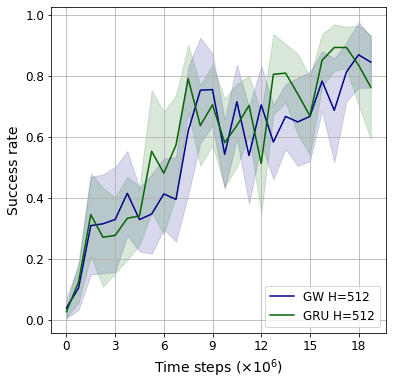

In [131]:
# Recover the global training step for the x axis
MAX_STEP = 1301
xs = [int(row[0]) for row in train_success_metric_data[1:MAX_STEP]]; len(xs)
# Recover the success rate that was logged for each varaitns

EXPNAME_TO_CSV_CIDX = {
  # "GW H=64": 4,
  # "GRU H=64": 10,
  "GW H=512": 16,
  "GRU H=512": 22
}
EXPNAME_TO_COLOR = {
  "GW H=64": "green",
  "GRU H=64": "blue",
  "GW H=512": "darkblue",
  "GRU H=512": "darkgreen",
}

# Holdes the list of success rates for each global step for each experiment variant
EXPNAME_SCORE_LIST = {k: [] for k in EXPNAME_TO_CSV_CIDX.keys()}; EXPNAME_SCORE_LIST
EXPNAME_SCORE_MIN_LIST = {k: [] for k in EXPNAME_TO_CSV_CIDX.keys()}; EXPNAME_SCORE_LIST
EXPNAME_SCORE_MAX_LIST = {k: [] for k in EXPNAME_TO_CSV_CIDX.keys()}; EXPNAME_SCORE_LIST

for row in train_success_metric_data[1:MAX_STEP]:
  for expname, cidx in EXPNAME_TO_CSV_CIDX.items():
    EXPNAME_SCORE_LIST[expname].append(float(row[cidx]))
    EXPNAME_SCORE_MIN_LIST[expname].append(float(row[cidx+1]))
    EXPNAME_SCORE_MAX_LIST[expname].append(float(row[cidx+2]))

EXPNAME_SCORE_LIST = {k: np.array(v) for k, v in EXPNAME_SCORE_LIST.items()}
EXPNAME_SCORE_MIN_LIST = {k: np.array(v) for k, v in EXPNAME_SCORE_MIN_LIST.items()}
EXPNAME_SCORE_MAX_LIST = {k: np.array(v) for k, v in EXPNAME_SCORE_MAX_LIST.items()}

# Check that the scores were properly extracted
for k, v in EXPNAME_SCORE_LIST.items():
  print(f"{k}: {len(v)}")


SMTH = 50
FONTSIZE=14

plt.rc("font", size=12)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for expname, exp_score_list in EXPNAME_SCORE_LIST.items():
  ax.plot(np.arange(0, len(xs), SMTH), exp_score_list.reshape(-1, SMTH).mean(axis=1).reshape(-1),
          c=EXPNAME_TO_COLOR[expname], label=expname)
  ax.fill_between(
    np.arange(0, len(xs), SMTH),
    EXPNAME_SCORE_MIN_LIST[expname].reshape(-1, SMTH).mean(axis=1).reshape(-1),
    EXPNAME_SCORE_MAX_LIST[expname].reshape(-1, SMTH).mean(axis=1).reshape(-1),
    alpha=0.15,
    color=EXPNAME_TO_COLOR[expname]
  )

# Customize the x-axis ticks
# tick_positions = np.linspace(0, 1300, num=10)  # Adjust the number of ticks as needed
tick_positions = np.arange(0, 1300 + 1, 200)  # Adjust the step size as needed
tick_labels = ['{:d}'.format(int(i *  20 / 1300)) for i in tick_positions]

# Use scientific notation for x-axis labels
# formatter = mpl.ticker.ScalarFormatter(useMathText=True)
# ax.xaxis.set_major_formatter(formatter)
# ax.xaxis.offsetText.set_visible(False)  # Hide the offset text (e.g., "+2e7")

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

ax.set_ylabel("Success rate", fontsize=FONTr~SIZE)
ax.set_xlabel("Time steps ($ \\times 10^6$)", fontsize=FONTSIZE)
ax.legend(loc="lower right")
# ax.set_xlim(0, 1400)
ax.grid(True)

# fig.savefig("GRU_GW_H_64_TrainingCurves.pdf")
# fig.savefig("GRU_GW_H_512_TrainingCurves.pdf")

# Rliable

In [4]:
!pip3 install git+https://github.com/google-research/rliable
!pip3 install inflection

  Cloning https://github.com/google-research/rliable to /tmp/pip-req-build-04i7utvd
  Running command git clone --filter=blob:none --quiet https://github.com/google-research/rliable /tmp/pip-req-build-04i7utvd
  Resolved https://github.com/google-research/rliable to commit b11d308fd4afb3e20f1a01f42cdcb30f40fc9f93
  Preparing metadata (setup.py) ... done
  Using cached arch-5.3.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (907 kB)
  Using cached statsmodels-0.14.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.1 MB)
  Using cached property_cached-1.6.4-py2.py3-none-any.whl (7.8 kB)
  Using cached patsy-0.5.4-py2.py3-none-any.whl (233 kB)
  Created wheel for rliable: filename=rliable-1.0.8-py3-none-any.whl size=19872 sha256=f368335e821ec66bb8220ee0664ddeb0828ea6d30ac5d35be87039b016c73c00
  Stored in directory: /tmp/pip-ephem-wheel-cache-4ugcy49b/wheels/f9/09/6d/d9ba2901d9e60a62c5a256d83e050b03e3201a4f28b89b38da
Successfully built rliable
  Using cached inflect

In [5]:
from rliable import library as rly
from rliable import metrics
from rliable import plot_utils

In [ ]:
# @title Imports
 
import collections
import numpy as np
import matplotlib.patches as patches
import sys
import pickle
import pandas as pd
import copy
import functools
import json
import os

import itertools as it
import random
import inspect
import scipy.stats
 
import getpass
import os.path as osp
 
# See warnings only once
import warnings
warnings.filterwarnings('default')
 
# from google.colab import files
import inflection
from functools import partial

# The answer to life, universe and everything
RAND_STATE = np.random.RandomState(42)

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [ ]:
#@title Plotting: Seaborn style and matplotlib params
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import seaborn as sns

sns.set_style("white")

# Matplotlib params
from matplotlib import rcParams
from matplotlib import rc

rcParams['legend.loc'] = 'best'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rc('text', usetex=False)

In [ ]:
#@title Plotting Helpers
# from google.colab import files

def save_fig(fig, name):
  file_name = '{}.pdf'.format(name)
  fig.savefig(file_name, format='pdf', bbox_inches='tight')
  # files.download(file_name) 
  return file_name

def set_axes(ax, xlim, ylim, xlabel, ylabel):
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  ax.set_xlabel(xlabel, labelpad=14)
  ax.set_ylabel(ylabel, labelpad=14)
 
def set_ticks(ax, xticks, xticklabels, yticks, yticklabels):
  ax.set_xticks(xticks)
  ax.set_xticklabels(xticklabels)
  ax.set_yticks(yticks)
  ax.set_yticklabels(yticklabels)

def decorate_axis(ax, wrect=10, hrect=10, labelsize='large'):
  # Hide the right and top spines
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_linewidth(2)
  ax.spines['bottom'].set_linewidth(2)
  # Deal with ticks and the blank space at the origin
  ax.tick_params(length=0.1, width=0.1, labelsize=labelsize)
  # Pablos' comment
  ax.spines['left'].set_position(('outward', hrect))
  ax.spines['bottom'].set_position(('outward', wrect))

In [ ]:
#@title Authenticate user to access GCP bucket (copy and enter the authentication code when you run the cell)
from google.colab import auth
auth.authenticate_user()